# Toy Review Notebook

In [205]:
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

## Extract

In [119]:
df = pd.read_csv(r".\Data/toy reviews.csv")
df.head(5)

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


## Transform

In [120]:
# Drop redundant columns
colsToDrop = [
    'uniq_id',
    'number_available_in_stock',
    'number_of_answered_questions',
    'customers_who_bought_this_item_also_bought',
    'description',
    'product_information',
    'product_description',
    'items_customers_buy_after_viewing_this_item',
    'customer_questions_and_answers',
    'customer_reviews',
    'sellers'
    ]

# Keep first 3 characters in 
modifiedDF = df.drop(columns=colsToDrop)

modifiedDF.head(5)

,product_name,manufacturer,price,number_of_reviews,average_review_rating,amazon_category_and_sub_category
0,Hornby 2014 Catalogue,Hornby,£3.42,15,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,2,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,17,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,1,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,3,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...


In [121]:
modifiedDF.dtypes

# TO DO
# Drop pound symbol from price column, convert to int
# Keep first three charaters from average_review_rating column, convert to int

product_name                        object
manufacturer                        object
price                               object
number_of_reviews                   object
average_review_rating               object
amazon_category_and_sub_category    object
dtype: object

In [122]:
# Keep first three charaters from average_review_rating column, convert to int
modifiedDF['average_review_rating'] = df['average_review_rating'].str[:3]
modifiedDF['average_review_rating'] = pd.to_numeric(modifiedDF['average_review_rating'])

# Drop pound symbol from price column, convert to int
modifiedDF['price'] = df['price'].str.replace(r'£', '')
modifiedDF['price'] = modifiedDF['price'].str.replace(r',', '')
modifiedDF['price'] = modifiedDF['price'].str.split('-').str[0]
modifiedDF['price'] = pd.to_numeric(modifiedDF['price'])

# Convert num of reviews to int
modifiedDF['number_of_reviews'] = df['number_of_reviews'].str.replace(r',', '')
modifiedDF['number_of_reviews'] = pd.to_numeric(modifiedDF['number_of_reviews'])

# Fix overfitting by reducing sub categories
modifiedDF['amazon_category_and_sub_category'] = modifiedDF['amazon_category_and_sub_category'].str.split('>').str[0]

modifiedDF.head(5)

,product_name,manufacturer,price,number_of_reviews,average_review_rating,amazon_category_and_sub_category
0,Hornby 2014 Catalogue,Hornby,3.42,15.0,4.9,Hobbies
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,16.99,2.0,4.5,Hobbies
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,17.0,3.9,Hobbies
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,39.99,1.0,5.0,Hobbies
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,32.19,3.0,4.7,Hobbies


### Create Dummy Variables

In [125]:
tmp = pd.get_dummies(modifiedDF['amazon_category_and_sub_category'], drop_first=True)
modifiedDF = pd.concat([modifiedDF, tmp], axis=1)
modifiedDF = modifiedDF.drop('amazon_category_and_sub_category', axis=1)

tmp = pd.get_dummies(modifiedDF['manufacturer'], drop_first=True)
modifiedDF = pd.concat([modifiedDF, tmp], axis=1)
modifiedDF = modifiedDF.drop('manufacturer', axis=1)

modifiedDF.head(5)

,product_name,price,number_of_reviews,average_review_rating,Baby & Toddler Toys,Bags,Bedding & Linens,Camping & Hiking,Car Parts,Characters & Brands,...,ukgiftstoreonline,unbespielt,uni-ball,unisex party bag fillers,universal hobby,woooow doll,xs-party,yugioh,zizzi,|MFG
0,Hornby 2014 Catalogue,3.42,15.0,4.9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,FunkyBuys® Large Christmas Holiday Express Fes...,16.99,2.0,4.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,9.99,17.0,3.9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,39.99,1.0,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,32.19,3.0,4.7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
modifiedDF = modifiedDF[modifiedDF['price'].notna()]
modifiedDF = modifiedDF[modifiedDF['number_of_reviews'].notna()]
modifiedDF = modifiedDF[modifiedDF['average_review_rating'].notna()]



In [127]:
modifiedDF.describe()

,price,number_of_reviews,average_review_rating,Baby & Toddler Toys,Bags,Bedding & Linens,Camping & Hiking,Car Parts,Characters & Brands,Cooking & Dining,...,ukgiftstoreonline,unbespielt,uni-ball,unisex party bag fillers,universal hobby,woooow doll,xs-party,yugioh,zizzi,|MFG
count,8550.000000,8550.000000,8550.000000,8550.000000,8550.000000,8550.000000,8550.000000,8550.0,8550.000000,8550.000000,...,8550.000000,8550.000000,8550.000000,8550.000000,8550.000000,8550.000000,8550.000000,8550.000000,8550.000000,8550.000000
mean,20.265209,9.599766,4.709602,0.009006,0.000468,0.000117,0.000117,0.0,0.087368,0.000468,...,0.000234,0.000117,0.000117,0.000117,0.001520,0.000117,0.000117,0.000468,0.000234,0.000117
std,46.366481,35.985428,0.371093,0.094476,0.021626,0.010815,0.010815,0.0,0.282391,0.021626,...,0.015293,0.010815,0.010815,0.010815,0.038966,0.010815,0.010815,0.021626,0.015293,0.010815
min,0.010000,1.000000,2.300000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.990000,1.000000,4.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.590000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,19.990000,6.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2439.920000,1399.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Load

In [186]:
X = modifiedDF.drop(['average_review_rating', 'product_name'], axis=1)
y = modifiedDF['average_review_rating']

In [187]:
X.head(5)

,price,number_of_reviews,Baby & Toddler Toys,Bags,Bedding & Linens,Camping & Hiking,Car Parts,Characters & Brands,Cooking & Dining,Die-Cast & Toy Vehicles,...,ukgiftstoreonline,unbespielt,uni-ball,unisex party bag fillers,universal hobby,woooow doll,xs-party,yugioh,zizzi,|MFG
0,3.42,15.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16.99,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.99,17.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,39.99,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,32.19,3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [188]:
y.head(5)

0    4.9
1    4.5
2    3.9
3    5.0
4    4.7
Name: average_review_rating, dtype: float64

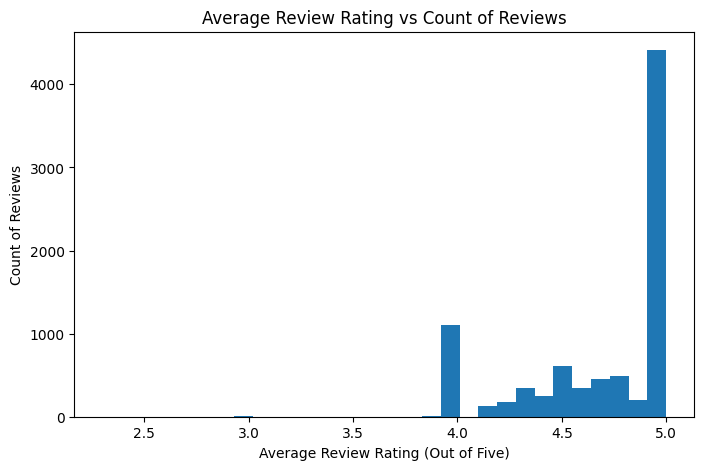

In [189]:
plt.figure(figsize=(8, 5))

plt.hist(y, bins= 30)
plt.xlabel("Average Review Rating (Out of Five)")
plt.ylabel("Count of Reviews")
plt.title("Average Review Rating vs Count of Reviews");

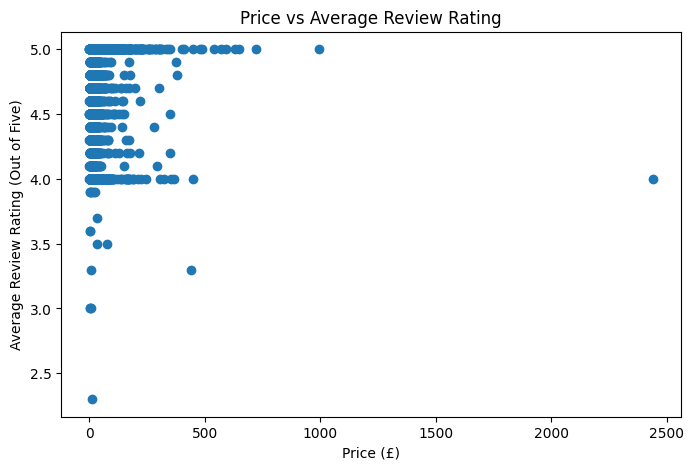

In [190]:
plt.figure(figsize=(8, 5))
plt.scatter(X['price'] ,y)
plt.ylabel("Average Review Rating (Out of Five)")
plt.xlabel("Price (£)")
plt.title("Price vs Average Review Rating");

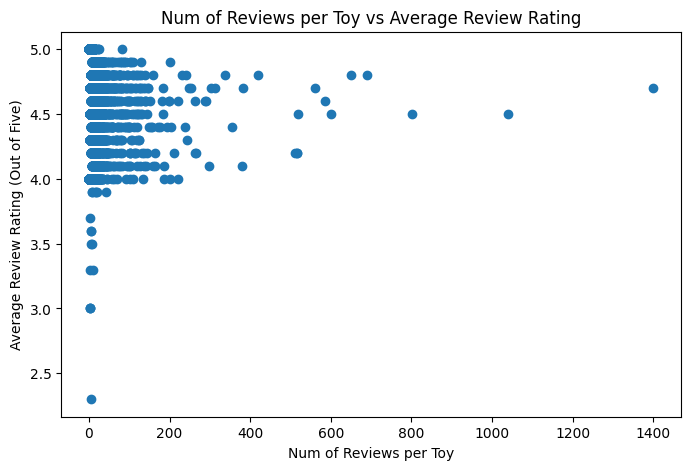

In [191]:
plt.figure(figsize=(8, 5))
plt.scatter(X['number_of_reviews'] ,y)
plt.ylabel("Average Review Rating (Out of Five)")
plt.xlabel("Num of Reviews per Toy")
plt.title("Num of Reviews per Toy vs Average Review Rating");

## Split the data

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Fit the Models

In [206]:
reg = LinearRegression().fit(X_train, y_train)

ridgeModel = Ridge(alpha=1.0)
ridgeModel.fit(X_train, y_train)

lassoModel = linear_model.Lasso(alpha=1.0)
lassoModel.fit(X_train, y_train)

elasticModel = ElasticNet(alpha=1.0)
elasticModel.fit(X_train, y_train);

In [194]:
regIntercept = round(reg.intercept_, 4)
ridgeIntercept = round(ridgeModel.intercept_, 4)
lassoIntercept = round(lassoModel.intercept_, 4)

print(f'Linear Regression Intercept = {regIntercept}')
print(f'Ridge Intercept = {ridgeIntercept}')
print(f'Lasso Intercept = {lassoIntercept}')

Linear Regression Intercept = 4.4819
Ridge Intercept = 4.7032
Lasso Intercept = 4.7131


In [207]:
regScore = round(reg.score(X_test, y_test), 4)
ridgeScore = round(ridgeModel.score(X_test, y_test), 4)
lassoScore = round(lassoModel.score(X_test, y_test), 4)
elasticScore = round(elasticModel.score(X_test, y_test), 4)

print(f'Linear Regression Score = {regScore}')
print(f'Ridge Score = {ridgeScore}')
print(f'Lasso Score = {lassoScore}')
print(f'Elastic Score = {elasticScore}')

Linear Regression Score = -2.5488152736628012e+16
Ridge Score = 0.0124
Lasso Score = 0.0063
Elastic Score = 0.0099


In [208]:
regPredict = reg.predict(X_test)
ridgePredict = ridgeModel.predict(X_test)
lassoPredict = lassoModel.predict(X_test)
elasticPredict = elasticModel.predict(X_test)

In [197]:
binSize = 50

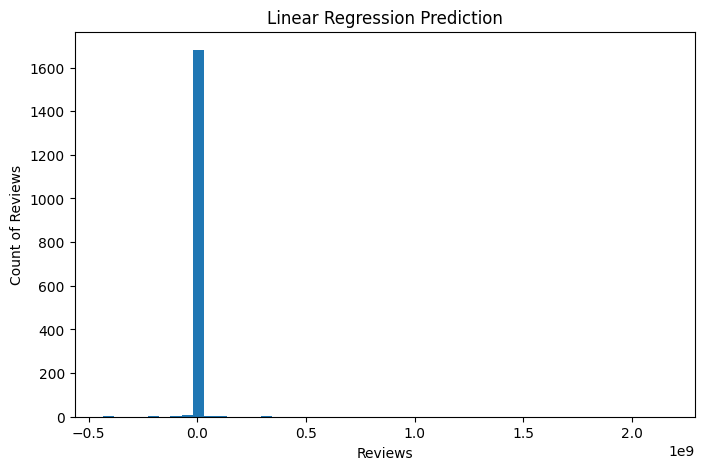

In [198]:
plt.figure(figsize=(8, 5))
plt.hist(regPredict, bins= binSize)
plt.xlabel("Reviews")
plt.ylabel("Count of Reviews")
plt.title("Linear Regression Prediction");

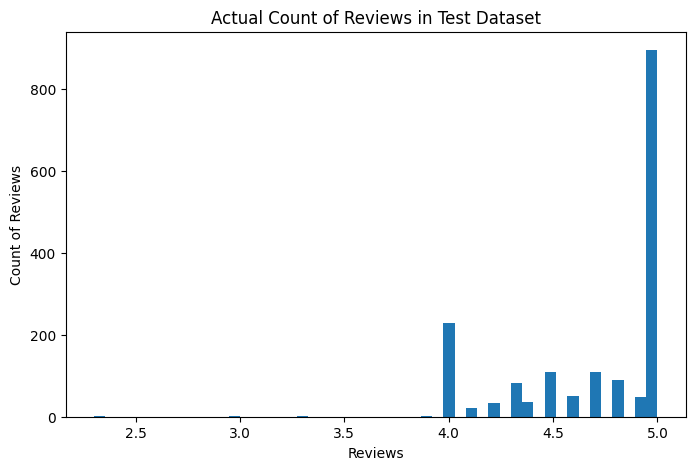

In [199]:
plt.figure(figsize=(8, 5))
plt.hist(y_test, bins= binSize)
plt.xlabel("Reviews")
plt.ylabel("Count of Reviews")
plt.title("Actual Count of Reviews in Test Dataset");

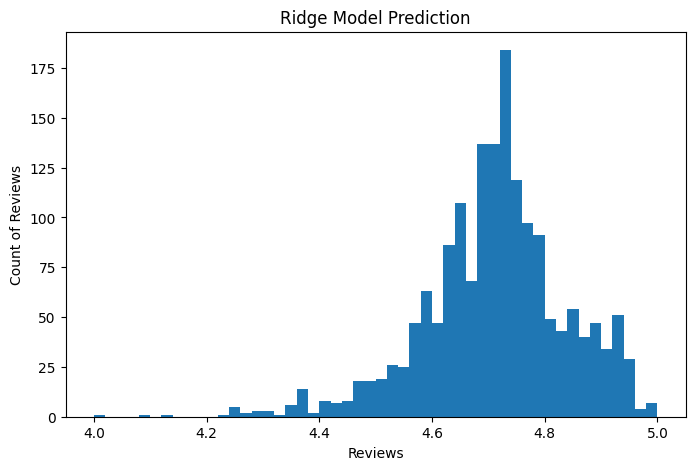

In [200]:
plt.figure(figsize=(8, 5))
plt.hist(ridgePredict, bins= binSize)
plt.xlabel("Reviews")
plt.ylabel("Count of Reviews")
plt.title("Ridge Model Prediction");

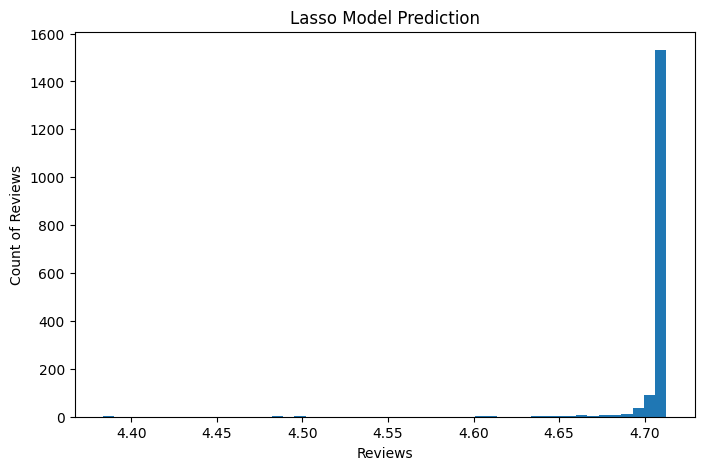

In [201]:
plt.figure(figsize=(8, 5))
plt.hist(lassoPredict, bins= binSize)
plt.xlabel("Reviews")
plt.ylabel("Count of Reviews")
plt.title("Lasso Model Prediction");

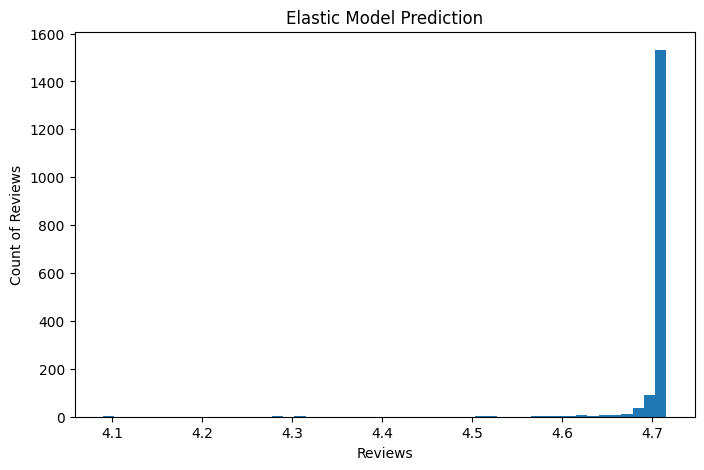

In [209]:
plt.figure(figsize=(8, 5))
plt.hist(elasticPredict, bins= binSize)
plt.xlabel("Reviews")
plt.ylabel("Count of Reviews")
plt.title("Elastic Model Prediction");

In [202]:
np.corrcoef(regPredict, y_test)

array([[ 1.        , -0.01508328],
       [-0.01508328,  1.        ]])

In [203]:
np.corrcoef(ridgePredict, y_test)

array([[1.        , 0.18827609],
       [0.18827609, 1.        ]])

In [204]:
np.corrcoef(lassoPredict, y_test)

array([[1.        , 0.10676153],
       [0.10676153, 1.        ]])

In [210]:
np.corrcoef(elasticPredict, y_test)

array([[1.        , 0.10676153],
       [0.10676153, 1.        ]])

## Notes To Reader

The goal of this journal was to create three models that can predict the price of a toy given the price, manufacturer, average review and type of toy. The algorithms to be used in this experiment are Linear Regression, LASSO and Ridge via the sklearn python library.

Although the models created in this journal have a low correlation with the actual values of the prices of the toys and can be seen as a failure the experiment was very insightful. Initially, one may suggest there is some correlation between the previously mentioned statement and price but perhaps this experiment reveals the opposite. Perhaps the scale of the prediction of the models is too narrow to complete.